In [118]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [119]:
X_dataset = pd.read_csv("q4x.dat", delimiter="\s+", header=None)
Y_dataset = pd.read_csv("q4y.dat", header=None)
X = np.array(X_dataset)
X1 = np.array(X[:,0])
X2 = np.array(X[:,1])
Y = np.array(Y_dataset)

In [120]:
# Data Normalization
X1 = (X1 - np.mean(X1)) / np.std(X1)
X2 = (X2 - np.mean(X2)) / np.std(X2)

x1 = np.array([X1])
x2 = np.array([X2])
X = np.concatenate((x1.T, x2.T), axis=1)
dataset = np.concatenate((X, Y), axis=1)

In [121]:
canada_ = []
alaska_ = []

for i in range(Y.size):
    if Y[i,0] == 'Canada':
        canada_.append(np.array([X1[i],X2[i]]))
    elif Y[i,0] == 'Alaska':
        alaska_.append(np.array([X1[i],X2[i]]))

canada_ = np.array(canada_)
alaska_ = np.array(alaska_)

In [122]:
# Alaska = 0    canada=1
phi = len(canada_)/len(Y)
mu = np.array([ np.mean(alaska_, axis=0), np.mean(canada_, axis=0)])
print("Phi: ", phi)
print("mean of distribution:")
print("For Alaska dataset (mu0): ", mu[0])
print("For canada dataset (mu1): ", mu[1])

diff1 = alaska_ - mu[0]
diff2 = canada_ - mu[1]
temp = np.concatenate((diff1, diff2))
cov_mat = np.matmul(np.transpose(temp),temp)/len(Y)
print("co-variance matrix:")
print(cov_mat)

Phi:  0.5
mean of distribution:
For Alaska dataset (mu0):  [-0.75529433  0.68509431]
For canada dataset (mu1):  [ 0.75529433 -0.68509431]
co-variance matrix:
[[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


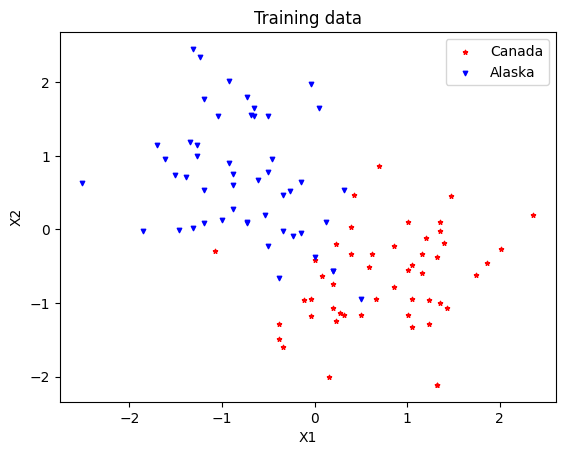

In [123]:
fig = plt.figure()

plt.scatter(canada_[:,0], canada_[:,1],label = "Canada", marker='*', c = 'r', s=10)
plt.scatter(alaska_[:,0], alaska_[:,1],label = "Alaska", marker='v', c = 'b', s=10)

plt.title('Training data')
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend()
plt.show()

[-3.38925452  2.43858399]
-1.1102230246251565e-15


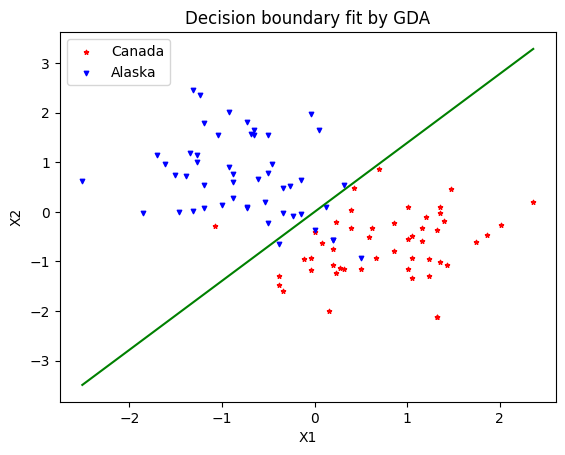

In [124]:
"""
the equation of the boundary separating the two regions
        mx + c = 0
"""
from cProfile import label


mu_diffT = np.transpose(mu[0] - mu[1])
cov_mat_inv = np.linalg.inv(cov_mat)
m = np.matmul(mu_diffT,cov_mat_inv)

p1 = np.matmul(np.transpose(mu[0]), np.matmul(cov_mat_inv,mu[0]))
p2 = np.matmul(np.transpose(mu[1]), np.matmul(cov_mat_inv,mu[1]))
p3 = np.log((1-phi)/phi)
c = (-p1 + p2 + p3)/2
print(m)
print(c)
x1_points = np.linspace(min(X[:,0]),max(X[:,0]),30)
x2_points = (c - m[0]*x1_points)/m[1]
fig = plt.figure()

plt.scatter(canada_[:,0], canada_[:,1],label = "Canada", marker='*', c = 'r', s=10)
plt.scatter(alaska_[:,0], alaska_[:,1],label = "Alaska", marker='v', c = 'b', s=10)
plt.plot(x1_points, x2_points, 'g')
plt.title('Decision boundary fit by GDA')
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend()
plt.show()

In [125]:
cov_mat0 =  np.matmul(np.transpose(alaska_ - mu[0]),(alaska_ - mu[0])) / len(alaska_)
cov_mat1 =  np.matmul(np.transpose(canada_ - mu[1]),(canada_ - mu[1])) / len(canada_)
print("Phi: ", phi)
print("mean of distribution:")
print("For Alaska dataset (mu0): ", mu[0])
print("For canada dataset (mu1): ", mu[1])
print("co-variance matrix for Alaska:\n",cov_mat0)
print("co-variance matrix for Canada:\n",cov_mat1)

Phi:  0.5
mean of distribution:
For Alaska dataset (mu0):  [-0.75529433  0.68509431]
For canada dataset (mu1):  [ 0.75529433 -0.68509431]
co-variance matrix for Alaska:
 [[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
co-variance matrix for Canada:
 [[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


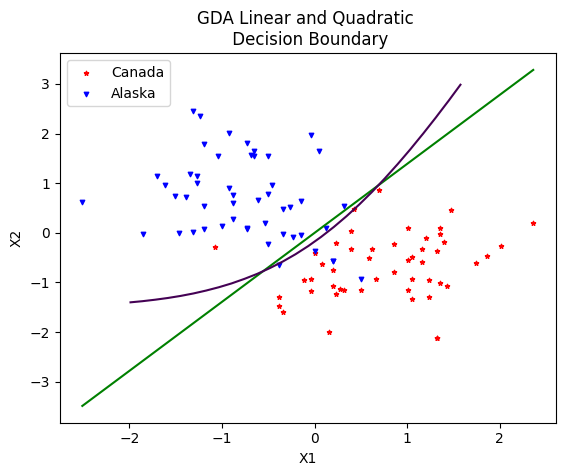

In [126]:
sigma = [cov_mat0,cov_mat1]
s_inv = []
s_det = []
for item in sigma:
    s_inv.append(np.linalg.inv(item))

for item in sigma:
    s_det.append(np.linalg.det(item))

''''
Quadratic decision boundry curve equation
X'AX + BX + C = 0
'''

A = (s_inv[0] - s_inv[1])
B = -2 * (np.matmul(np.transpose(mu[0]), s_inv[0]) - np.matmul(mu[1].T, s_inv[1]))

C = (np.matmul(np.transpose(mu[0]),np.matmul(s_inv[0],mu[0])) - 
    (np.matmul(np.transpose(mu[1]),np.matmul(s_inv[1],mu[1])))- 
    2 * np.log(((1-phi)/phi) * (s_det[1] / s_det[0])))
a = np.linspace(-2,2,30)
a_0 = np.outer(a, np.ones(30))
b = np.linspace(-3,3,30)
b_0 = np.transpose(np.outer(b, np.ones(30)))

mesh = []
for i in a:
    for j in b:
        mesh.append(np.array([i,j]))

mesh = np.array(mesh)
qb = []
for cord in mesh:
    qb.append(np.matmul(np.transpose(cord),np.matmul(A,cord)) + np.matmul(B,cord) + C)
qb = np.array(qb).reshape(30,30)

fig = plt.figure()

plt.scatter(canada_[:,0], canada_[:,1],label = "Canada", marker='*', c = 'r', s=10)
plt.scatter(alaska_[:,0], alaska_[:,1],label = "Alaska", marker='v', c = 'b', s=10)
plt.plot(x1_points, x2_points, 'g')
plt.contour(a_0, b_0, qb,[0])
plt.title('GDA Linear and Quadratic \n Decision Boundary')
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend()
plt.show()